# Logit vs Random Forest

Logistic Regression Model Evaluation:
Accuracy: 0.8600
Random Forest Model Evaluation:
Accuracy: 0.9067


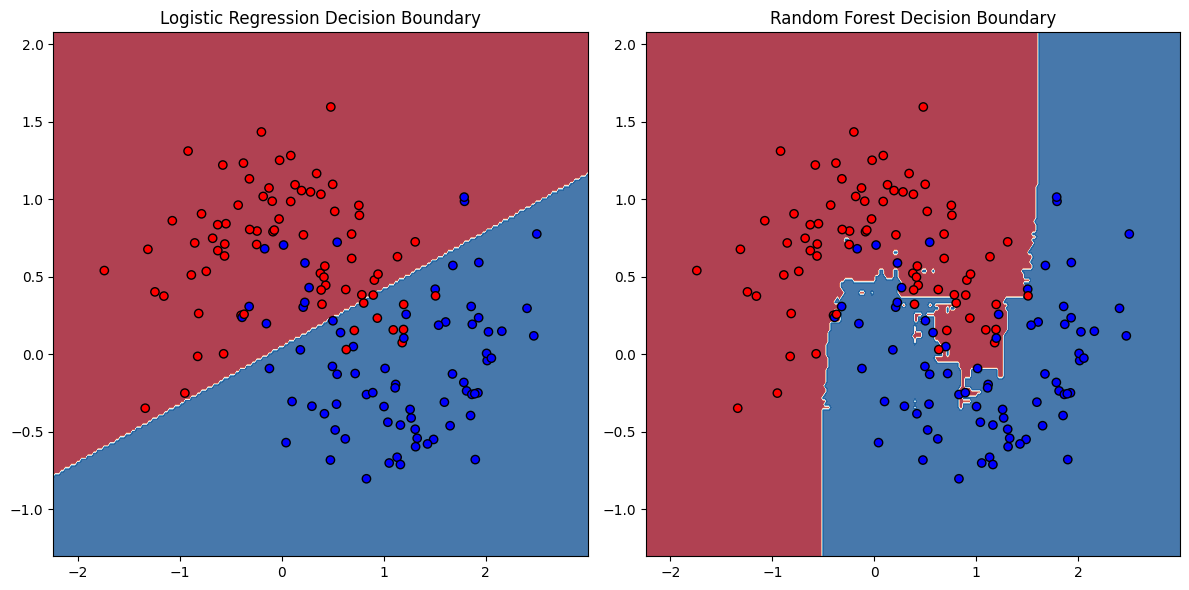

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Generate a synthetic dataset that is not linearly separable
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the models
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate and print results
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {lr_accuracy:.4f}")

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)
print("Random Forest Model Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")

# Visualize the decision boundaries
def plot_decision_boundary(X, y, model, ax, title):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_decision_boundary(X_test, y_test, lr_model, axes[0], "Logistic Regression Decision Boundary")
plot_decision_boundary(X_test, y_test, rf_model, axes[1], "Random Forest Decision Boundary")
plt.tight_layout()
plt.show()